# Determine it will rain tomorrow or not? 
using logistic regression Predict whether or not it will rain tomorrow by training a binary classification model 

on target RainTomorrow Content This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No. This dataset contains about 10 years of daily 

weather observations from numerous Australian weather stations. The target RainTomorrow means: Did it rain the next day?
 
Yes or No.

# 1) Aquire the data 

In [71]:
import pandas as pd 
import seaborn as sns

In [6]:
df = pd.read_csv('Dataset-33-Logistic Regression-weatherAUS.csv')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,06/12/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,07/12/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,08/12/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,09/12/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,10/12/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


# 2) Visualize and Process the Data

In [61]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [62]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,12.628837,13.464770,24.219206,2.130397,5.503135,7.735626,7.485537,40.877366,7.122935,7.574424,...,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,2.346960,0.220259
std,7.301231,6.416689,6.970676,7.014822,3.696282,3.758153,4.792305,13.335232,4.660823,4.711700,...,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,8.731885,0.414425
min,0.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000,0.000000
25%,7.000000,8.600000,18.700000,0.000000,2.800000,5.000000,3.000000,31.000000,3.000000,3.000000,...,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000,0.000000
50%,13.000000,13.200000,23.900000,0.000000,5.000000,8.600000,8.000000,39.000000,7.000000,8.000000,...,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000,0.000000
75%,19.000000,18.400000,29.700000,0.600000,7.400000,10.700000,12.000000,48.000000,11.000000,12.000000,...,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.600000,0.000000
max,25.000000,31.400000,48.100000,206.200000,81.200000,14.500000,15.000000,124.000000,15.000000,15.000000,...,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,367.600000,1.000000


In [63]:
df.shape

(56420, 24)

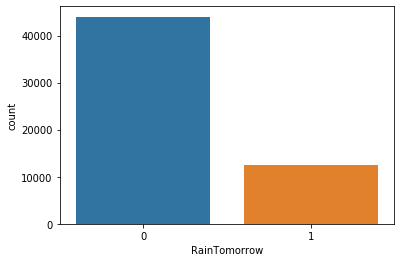

In [64]:
sns.countplot(x = 'RainTomorrow', data = df )

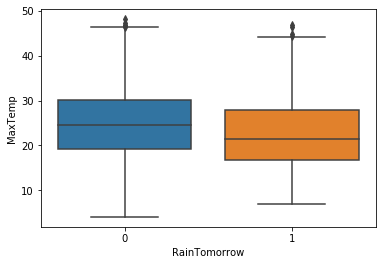

In [65]:
sns.boxplot(x = 'RainTomorrow',y='MaxTemp', data=df)


In [67]:
df.dropna(inplace=True)

In [68]:
from sklearn.preprocessing import LabelEncoder
categorical_var = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
le = LabelEncoder()
for i in categorical_var:
    df[i] = le.fit_transform(df[i])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,01/01/2009,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,02/01/2009,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,04/01/2009,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,05/01/2009,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,06/01/2009,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0


# Split the data 

In [69]:
x = df.drop(['Date','RISK_MM', 'RainTomorrow'] , axis = 1 )
y = df['RainTomorrow']

 Divide the data 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test , y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=156)


# 3) Train the  Data

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr_model = LogisticRegression()

In [46]:
result = lr_model.fit(x_train ,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



# 4) Test the Model

In [48]:
prediction = result.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
from sklearn.metrics  import accuracy_score
accuracy_score(y_test, prediction)

0.8518255937610776

# 5) Measure Performance of Model


In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
cm = confusion_matrix(y_test, prediction)

In [60]:
cm

array([[8298,  491],
       [1181, 1314]], dtype=int64)